# Алгоритъм за изчисление на Distance трансформации за линейно време



## 1. Въведение

Трансформациите на разстояния или Distance трансформации играят важна роля в обработката на изображения, изчислителната геометрия, компютърната графика и разпознаването на модели. По-дефиниция трансформацията  на разстояние е разстоянието от всяка точка до най-близката точка от даден тип. В контекста на обработката на изображения можем да си представяме трансформацията като разстоянието от всеки пиксел до най-близкия ненулев пиксел.

Използва се в алгоритми за Image matching,  Object recognition, Path planning и Navigation и други. Изчислението на  трансформациите на разстояния на изображения намира широко приложение, като се прилага върху данни, представени чрез пиксели или воксели.  
Примери:
- *Hausdorff*
- *Chamfer*
- *Скелетонизация*
- *Алгоритъм Watershed*
- *Алгоритъм Hough*

## 2. Метрики за разстояние

Тъй като говорим за разстояния между различни точки, е нужно да дефинираме понятието метрика $d(x,y)$.
Съществуват различни метрики за разстояние, ето някои от тях:
1. Евлкидово разстояние: $d(x,y)=\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ... + (x_n - y_n)^2}$
2. Манхатаново разстояние:  $d(x,y)=|x_1 - y_1| + |x_2 - y_2| + ... + |x_n - y_n|$
3. Разстояние на Чебишев: $d(x,y)=\max{(|x_1 - y_1| + |x_2 - y_2| + ... + |x_n - y_n|)}$

## 3. Дефиниции за трансформации на разстояния

За пространството $G $ и множеството от точки $P $, където ${P}\subseteq{G}$, в общия случай представяме трансформаците с една от следните две формули:

1. **Generalized Distance Transform**

## $$D_{f}(p)_{p \in P}=\min_{q \in G} {(d(p,q)+f(q))} $$

Тук $d(p,q) $ е някаква мярка за разстоянието (не непременно метрика) между $p $ и $q $, а $f(q) $ представлява произволна функция за принадлежност на елементите от разглежданото множество, като ${f:G}\to{R} $. Интуитивно за всяка точка $p $ намираме точка $q $, която е близка до $p $ и за която $f(q) $ е малка, търсим именно малки $f(q) $, защото ако $ f$ има малка стойност на някакво място, то $D_f(p) $ ще има по-малка стойност. Когато $d(p,q) $ е евклидовото разстояние, ние наричаме $D_f $ евклидова трансформация на разстояние (EDT).
Тази дефиниция е тясно свързана с традиционалната формула и разбиране за трансформация на разстояние на набор от точки $P\subseteq{G}$, което асоциира на всяка точка в мрежата (матрицата) разстоянието до най-близката точка в $P $.
## $$D_P{(p)} = \min_{q \in G} d(p,q) $$

2. **Дефиниция с индикаторна функция (бинарна функция за принадлежност)**

## $$D_{P}(p)_{p \in P}=\min_{q \in G} {(d(p,q)+1(q))}, \textrm{ where} $$

# $$ 1(q) =\{^{0, {q \in P}}_{{\infty},{ q \notin P}}$$

Можем да забележим, че тази дефиниция е почти същата като дефиницията за генерализирана трансформация на разстояние, с изключение на това, че използва индикаторната функция $1(q) $, а не произволна функция $f(q) $.

В контекста на обработката на изображения, често разглеждаме бинарни изображения, които представят пространството $G $ и множеството от точки $P $. При тях трансформацията е ново изображение със същия размер като оригиналното, където индивидуалните пиксели имат за стойности реални числа, които представляват разстоянието. Именно заради това много алгоритми за изчисляване на трансформациите на разстояния използват показаната дефиниция.

В общия случай за получаването на изображение, което да представлява трансформация на разстоянието на дадено изображение, обикновено се следва посочената по-долу поредица от стъпки:
1. Преминаване към grayscale изображение и бинаризация, чрез thresholding или морфологични операции при по-зашумени изображения.
2. Изчисляване на трансформация на разстояние, чрез някоя метрика за разстояние, в случая е използвано евклидово разстояние.

![Binary Image](DocumentationImageIlustration/camel-black&white.png)
![Binary Image](DocumentationImageIlustration/camel-transformed.png)


## 4. Алгоритми

Интуитивна имплементация на алгоритъм за трансформация на разстояние в $d$-мерно пространство е пресмятане на разстоянието на всяка точка до всяка друга по d-измерения, оттук виждаме, че сложността е ${O(n^d)}$, което е твърде бавно дори в двумерния случай.

Съществуват различни бързи алгоритми за трансформация на разстояния, представени в "A.Rosenfeld, J.Pfalte: Sequential operations in digital picture processing, 1966", които използват метриките на Манхатан и Чебишев, но няма да се фокусираме върху тях.

В този проект ще анализираме един алгоритъм, предложен от "P.Felzenszwalb, D.Huttenlocher: Distance Transforms of Sampled Functions".
    
## 5. Минимална конволюция

Популярен метод за забързване на алгоритмите за изчисление на трансформации на разстояния е с използването на минимална конволюция. Тази операция и трансформациите на разстояния играят важна роля в grayscale морфологията. Минималната конволюция на две функции f и g се дефинира като:
    
## $${(f \otimes g)}(p)_{p \in P}=\min_{q \in G} {(f(q)+g(p-q))} $$

Забелязваме, че дефинцията е подобна като тази за Generalized Distance Transform, с единствена разлика, че $d(p,q) = g(p−q)$. Алгоритъмът, върху който се фокусираме, именно Squared Euclidian Distance Transform, може да се разглежда като алгоритъм за изчисляване на минимални конвлоюции. Основният алгоритъм решава едномерни проблеми, като многомерните случаи се обработват чрез разлагането им в серия от едномерни случаи.

В имплементацията изчисляваме минималната конволюция на едномерна функция $f $ и парабола, като отбелязваме връзка с долните обвивки на параболите. По дефиниция долната обвивка на краен набор от функции е функцията, чиято стойност във всяка точка е минимумът на функциите в дадения набор.

## 6. Алгоритъм 

Както казахме по-рано, в тази имплментация използваме Squared Euclidian Distance, дефинирано както следва:  

 $$D_{f}(p)=\min_{q \in G} {((p,q)^2 +f(q))}\textrm{,  където} $$
 
 $$G = \{0,...,n−1\} \textrm{ е едномерно пространство и }f:G\to R $$

Реално стойността на трансформациите на разстоянията в $p$ са височините на долната обвивка в съответните точки.
Алгоритъмът може да се раздели на две основни стъпки:
1. Изчисляване на долната обвивка за всяка точка, което за всяка точка вкючва едно вмъкване за прабола и пресечна точка и най-много едно изтриване на прабола и пресечна точка.
2. Изчисляване на разстоянията с помощта на долната обвивка.

Долната обвивка се изчислява, като последователно се изчислява долната обвивка на първите $q $ параболи, наредени спрямо хоризонталните позиции на върховете им. Структурата се представя чрез два масива: $v$, съдържащ върховете на параболите и $z$, съдържащ пресечните точки, а променливата $k$ се използва за следене на броя на параболите в долната обвивка.
Ще покажем същността на алгоритъма за изчисление на долна обвивка:

За всяка точка от пространството построяваме парабола.


![Binary Image](DocumentationImageIlustration/single_parabola.jpg)


Винаги сравняваме двойка последователни параболи и за да изчислим долната обвивка, е нужно да можем да пресметнем пресечните точки на параболите. Пресечната точка на две параболи се изчислява по формулата:

$$s=\frac{(f(r) + r^2) -(f(q) + q^2)}{2r -2q} $$

Винаги сравняваме къде се намира новата пресечна точка $s $ спрямо последната във вектора $z[i] $ и съответно имаме два сценария: 
- ***да се намира вдясно от последната пресечна точка:***

Тъй като на илюстрацията нямаме предишни пресечни точки, с които да сравняваме, новата пресечна точка се явява най-лява и заради това я добавяме във вектора $z $, както и добавяме върха на новата парабола във вектора $v$.


![Binary Image](DocumentationImageIlustration/second_parabola.jpg)


- ***да се намира вляво от последната пресечна точка:***


![Binary Image](DocumentationImageIlustration/left_intersection.jpg)


При този сценарий виждаме, че новата точка на пресичане $s $ се намира преди предходната $z[k]$ и тогава, за да изчислим правилно долната обвивка е нужно да изтрием параболата $v{[k]} $ и предишната пресечна точка $z[k] $ от съответните вектори, като намалим стойността на променливата $k $ с 1. Тази процедурата по изтриване се повтаря, докато пресечната точка $s $ не се класифицира като най-дясна за всички предходни  $z[i]$, където $i\in{0,..,k-1}$. Kато резултат получаваме обновената долна обвивка. Oстава да изчислим стойностите на distance трансформацията чрез нея, като използваме височината на долната обвивка за всяка точка от пространството.


![Binary Image](DocumentationImageIlustration/lower_envelope.jpg)

Следващата илюстрация демонстрира как изглеждат долните обвивки, в зависимост от различните метрики за разстояние, които можем да използваме в алгоритъма (Евклид, Манхатан, Чебишев).

![Binary Image](DocumentationImageIlustration/envelope_comparison.png)


## 6.1. Сложност на алгоритъма

При анализ на времевата сложност на алгоритъма, забелязваме, че добавяме всяка парабола към долната обвивка точно един път. Добавянето на една парабола може да доведе до изтриването на много други, но всяка парабола се изтрива най-много веднъж, така че времевата сложност по редове е $O(n)$. Изисляването на стойностите за трансформациите на разстоянията разглежда всяка точка от пространството и всяка парабола в долната обвивка най-много веднъж, тоест и втората част на алгоритъма има времева сложност $O(n)$. Оттук можем да заключим, че общата сложност на алгоритъма е отново $O(n)$.

## 6.2 Имплементация на алгоритъма

In [1]:
import numpy as np
import cv2
import time
from IPython.display import Image, display
import os
import matplotlib.pyplot as plt 

# 1D Distance transform Euclidian distance
def distance_transform(vector, n, inf=1e20):
    f = vector
    # Holds distance transform values
    distance_transforms = np.zeros(n, dtype=np.float64)
    # v holds parabolas for each grid point
    v = np.zeros(n, dtype=int)
    # z holds previous intersection points
    z = np.zeros(n+1, dtype=np.float64)
    z[0] = -inf
    z[1] = inf
    k = 0
    # Compute lower envelope
    for q in range(n)[1:]:
        intersection_point = ((f[q]+ q*q) - (f[v[k]] + v[k]*v[k]))/(2*q-2*v[k])
        # Compares new intersection point with previous ones
        while intersection_point <= z[k]:
            k -= 1
            intersection_point  = ((f[q]+q*q)-(f[v[k]]+v[k]*v[k]))/(2*q-2*v[k])
        k +=1
        v[k] = q
        z[k] = intersection_point
        z[k+1] = inf

    k=0
    # Fill in values of distance transform
    for q in range(n):
        while (z[k+1] < q):
            k +=1
        distance_transforms[q] = (q-v[k])*(q-v[k]) + f[v[k]]
    
    return distance_transforms

## 7. Произволни измерения

Нека $G $ e $m \times n$ матрица и $f:G\to R $ е функция върху матрицата, то тогава представяме двумерната трансформация на разстояния, използваща квадратичното евклидово разстояние, по следния начин:
$$D_{f}(x,y)=\min_{x',y'} {((x-x')^2 + (y-y')^2 +f(x',y'))}= \textrm{ } $$
$$\textrm{=}\min_{x'} {((x-x')^2 + \min_{y'}((y-y')^2 +f(x',y')))}= \textrm{ } $$
$$\textrm{=}\min_{x'} {((x-x')^2 + D_{f|x'}(y))} $$


Оттук виждаме, че $D_{f|x'}(y) $ е трансформация на разстояние на $f $ в едномерното пространство, ограничена за колоната, индексирана по $x' $.


Така показахме, че двумерната трансформация на разстояния може да бъде изчислена, като първо се изчисли в едномерния случай по всяка колона на матрицата и след това се пресметне отново едномерната трансформация на разстояния по всеки ред от резултата.
Това важи и за произволни измерения, чрез композирането на трансформации по всяко
измерение на пространството. В този случай сложността е $О(dn)$, където $d $ е размерността.


## 8. Ресурси

[1] OpenCV documentation: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

[2] A general algorithm for computing distance transforms in linear time: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.476.4863&rep=rep1&type=pdf

[3] Distance Transforms of Sampled Functions: http://www.theoryofcomputing.org/articles/v008a019/v008a019.pdf?fbclid=IwAR1HqL5z4x4x5JAqvI-qNcbREXN3PQw1PZOhSrpeeXIAVSrU2cUBgn52O9E

[4] Cornwell University Distance Transform presentation: https://www.cs.cornell.edu/courses/cs664/2008sp/handouts/cs664-7-dtrans.pdf

[5] Wikipedia Convolution: https://bg.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D0%B2%D0%BE%D0%BB%D1%8E%D1%86%D0%B8%D1%8F

[6] Wikipedia Lower Envelope: https://en.wikipedia.org/wiki/Lower_envelope

[7] Wikipedia distance tranforms: https://en.wikipedia.org/wiki/Distance_transform

[8] Medium EDT article: https://medium.com/on-coding/euclidean-distance-transform-d37e06958216

In [2]:
# 2D Distance transform for a binary vector using square distance
def distance_transform_image(image, inf=1e20, on=0):
    height = image.shape[0]
    width = image.shape[1]
    out = np.ones([height, width], dtype=np.float64)*inf
    out[image==on]=0
    image = out
    
    # Columns
    for x in range(width):
        f = image[:,x]
        image[:,x] = distance_transform(f, height)
    # Rows
    for y in range(height):
        f = image[y,:]
        d = distance_transform(f, width)
        image[y,:] = d
    return image

In [3]:
def black_and_white_image(filename):
    img = cv2.imread(filename)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    thresh = cv2.inRange(ycrcb, np.array([0, 135, 85]), np.array([255, 180, 135]))
    
    # Get outer contour
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    big_contour = max(cnts, key=cv2.contourArea)
    
    # Draw filled contour on black background
    filled = np.zeros_like(thresh)
    cv2.drawContours(filled, [big_contour], -1, (255), cv2.FILLED)
    cv2.imwrite(bw_file_name, filled)

def scale_image(scale_percent, image):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)


def pixel_count(image):
    return image.shape[0]*image.shape[1]


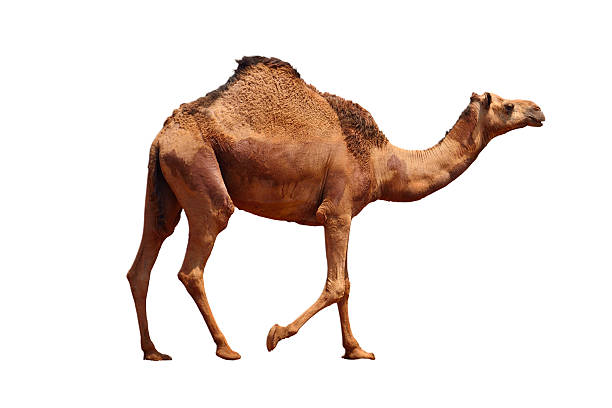

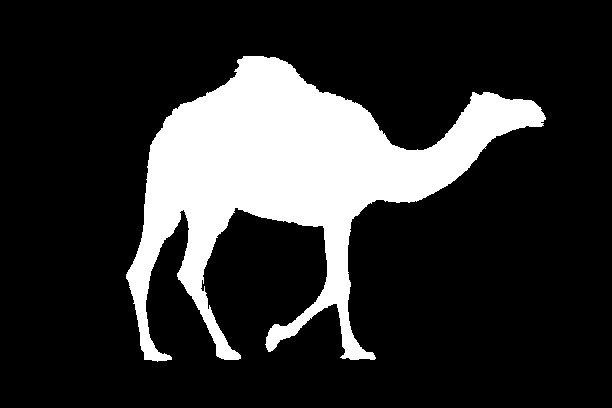

In [4]:
# File names
filename = 'camel.jpeg'
bw_file_name = os.path.splitext(filename)[0]+'-black&white.png'
transformed_file_name = os.path.splitext(filename)[0]+'-transformed.png'
downsized_twice_name = os.path.splitext(filename)[0]+'-downsized-twice.png'
downsized_4_name = os.path.splitext(filename)[0]+'-downsized-4.png'

listOfImageNames = [filename,
                    bw_file_name]

# Get contour b&w image
black_and_white_image(filename)
first_image = cv2.imread(bw_file_name, cv2.COLOR_BGR2GRAY)

# Downsize images
second_image = scale_image(50, first_image)
third_image = scale_image(25, first_image)

# Display original and b&w image
for imageName in listOfImageNames:
    display(Image(filename=imageName))

DT time for image 1
	 5.068632125854492
Image 1 resolution: (408, 612)


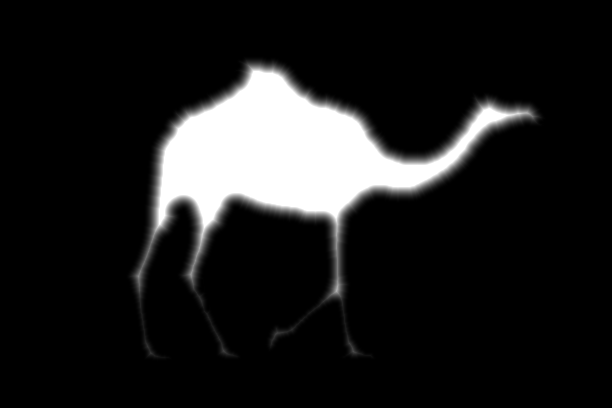

DT time for image 2
	 1.262030839920044
Image 2 resolution: (204, 306)


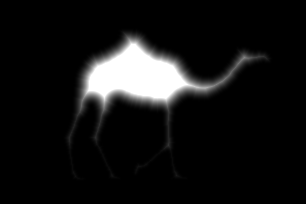

DT time for image 3
	 0.361386775970459
Image 3 resolution: (102, 153)


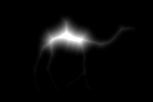

In [5]:
# Show times and coputed images of distance transforms
def compute_dt_measure_times(images, filenames):
    transform_times = []
    i = 1
    for image in images:
        start = time.time()
        print("DT time for image",i)
        camel = distance_transform_image(image)
        end = time.time()
        transform_time = end - start
        print('\t', transform_time)
        print('Image', i, 'resolution:',image.shape)
        cv2.imwrite(filenames[i-1], camel)
        display(Image(filenames[i-1]))
        transform_times.append(transform_time)
        i+=1
    return transform_times


transform_times = compute_dt_measure_times([first_image, second_image, third_image], [transformed_file_name,downsized_twice_name, downsized_4_name])

CV2 DT time for first image:
	 0.012489080429077148


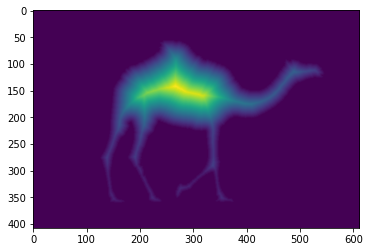

In [6]:
# CV2 EDT implementation comparison
start = time.time()
print("CV2 DT time for first image:")
out = cv2.distanceTransform(first_image, distanceType=cv2.DIST_L2, maskSize=5)
end = time.time()
cv2_transform_time = end - start
print('\t', cv2_transform_time)
plt.imshow(out)


In [7]:
# Proove linear by time and pixel count

times2_pixel_second = cv2.resize(second_image,(408,306),  interpolation = cv2.INTER_AREA)

print('Pixel count for second image:', pixel_count(second_image))
print("Second imageDT time:")
print('\t', transform_times[1],'\n')

print('Pixel count for times2_pixel_second:', pixel_count(times2_pixel_second))
start = time.time()
print("Second image Times2 pixels DT time:")
out = distance_transform_image(times2_pixel_second)
end = time.time()
times2_pixel_transform_time = end - start
print('\t', times2_pixel_transform_time )

Pixel count for second image: 62424
Second imageDT time:
	 1.262030839920044 

Pixel count for times2_pixel_second: 124848
Second image Times2 pixels DT time:
	 2.682082176208496


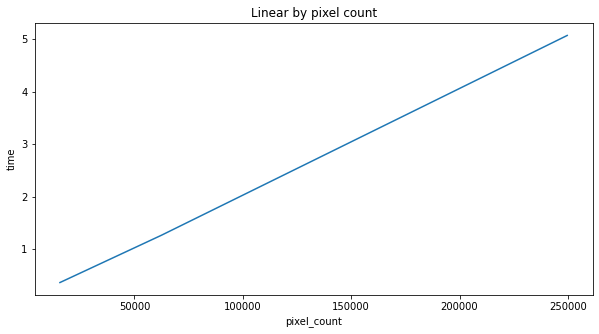

In [8]:

plt.figure(figsize=(10, 5))
plt.plot([pixel_count(first_image), pixel_count(second_image), pixel_count(third_image)], transform_times)#[first_transform_time, second_transform_time, third_transform_time])
plt.title('Linear by pixel count')
plt.xlabel('pixel_count')
plt.ylabel('time')
plt.show()